<a href="https://colab.research.google.com/github/SarahEldreny/Machine-Learning-Unsupervised-Labs-/blob/main/K_Means_Algorithms_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-**means**

K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

Here, we will show you how to estimate the best value for K using the elbow method, then use K-means clustering to group the data points into clusters.
# **How does it work**?

First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid (functionally the center) of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the inertia (a distance-based metric) and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.


## Example

Start by visualizing some data points:

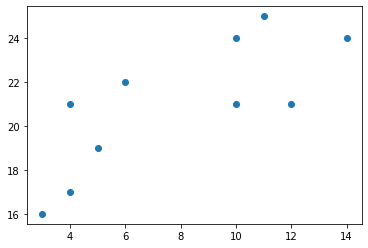

In [1]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21,19, 24,17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Now we utilize the elbow method to visualize the intertia for different values of K:

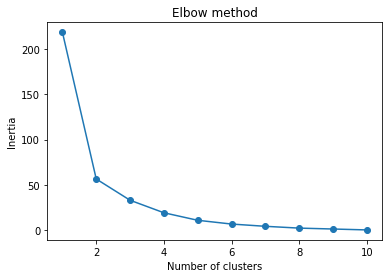

In [19]:
from sklearn.cluster import KMeans

# Turn the data into a set of points:
data = list(zip(x, y))
#data = [(4,21), (5,19),(10,24),(4,17),(3,16),(11,25),(14,24),(6,22),(10,21),(12,21)]

# In order to find the best value for K, we need to run K-means across our data for a range of possible values. 
# We only have 10 data points, so the maximum number of clusters is 10. 
# So for each value K in range(1,11), we train a K-means model and plot the intertia at that number of clusters:
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The elbow method shows that 2 is a good value for K, so we retrain and visualize the result:

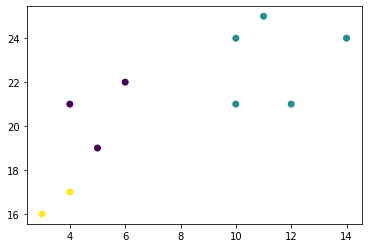

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)



plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

In [22]:
from sklearn.metrics import silhouette_score

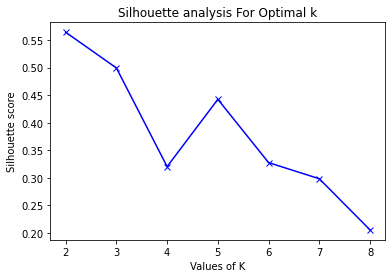

In [25]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_


 # silhouette score
  silhouette_avg.append(silhouette_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()